#CNN: Vegetable Classification


Developed a machine learning model employing Convolutional Neural Networks (CNNs) to accurately classify and identify vegetables designed to provide effective inventory management and quality control in agricultural supply networks.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import os
import PIL

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#display all comumns of the dataframe
#pd.options.display.max_columns = None

### Rule to connect your Drive for Dataset


1.   Create a Google Drive folder named **Level6**.
2.   Create a sub-folder named **AI**.
3.   Create another sub folder named NLP Datasets, (You can just upload the folder from above Google Drvie link.
4.   Now, at last upload **Vegetable Classification** folder.

*Note: Why follow this format?
This format for locating file will help every member of the group to streamline their path and there wont be any error while loading the dataset.*


## Load Dataset


In [ ]:
data_dir = "D:\College\AI ML\Vegetable Classification\Train"

In [ ]:
# Hyper-parameters:
batch_size = 32 #The batch size of the image
img_height = 180 #Height of image
img_width = 180 #Width of the image

How do you split between validation and train set?

In [ ]:
#Train dataset using images from a directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  # Path to the directory containing images
  data_dir,
  # Proportion of data to use for training
  validation_split=0.2,
  # Subset of data to use (in this case, training)
  subset="training",
  # Seed for random shuffling and splitting
  seed=100,
  # Target image size
  image_size=(img_height, img_width),
  # Batch size for the dataset
  batch_size=batch_size #Change in batch size for faster model train
  )

Found 6673 files belonging to 5 classes.
Using 5339 files for training.


In [ ]:
#Validation dataset using images from a directory
val_ds = tf.keras.utils.image_dataset_from_directory(
  # Path to the directory containing images
  data_dir,
  # Proportion of data to use for validation
  validation_split=0.2,
  # Subset of data to use (in this case, validation)
  subset="validation",
  # Seed for random shuffling and splitting
  seed=100,
  # Target image size
  image_size=(img_height, img_width),
  # Batch size for the dataset
  batch_size=batch_size
  )

Found 6673 files belonging to 5 classes.
Using 1334 files for validation.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['Bell-Pepper', 'Lemon', 'Onion', 'Potato', 'Tomato']


In [ ]:
# Loop through batches of images and labels in the train dataset
for image_batch, labels_batch in train_ds:

    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


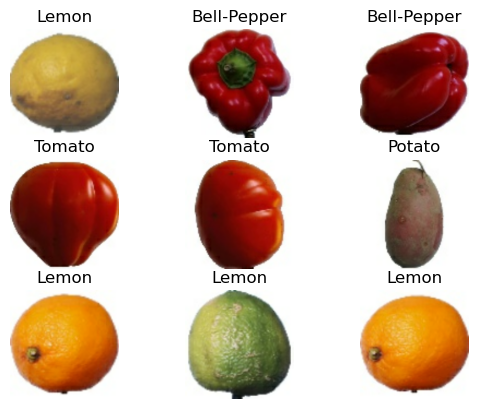

In [ ]:
# Loop through the first batch of images and labels in the train dataset
for images, labels in train_ds.take(1):
  # Loop through the first 9 images in the batch
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with the set of hyperparameters defined above.
    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in the image.
    num_classes[int] = Number of classes in the dataset.
    Output Args:
    model -> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer, [For Keras, the input shape must be (image height, image width, channels ie 3:RGB)]
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)), #Normalizes the input image pixel values to the range [0, 1] by dividing them by 255, "input shape" gives image dimensions and the number of color channels.

        # First Block of Convolution and Pooling Operations.
        layers.Conv2D(16, (3, 3), padding="same", activation="relu"),                 # 16 filters of size (3, 3) with ReLU activation.
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Second Block of Convolution and Pooling Operations.
        layers.Conv2D(32, (3, 3), padding="same", activation="relu"),                 # 32 filters of size (3, 3) with ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Third Block of Convolution and Pooling Operations.
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),                 # 64 filters of size (3, 3) with ReLU activation
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),



        # Fully connected classifier.
        layers.Flatten(),                             #Converting the 2D image into a 1D image
        layers.Dense(128, activation="relu"),         #Capture high-level features from the flattened layer
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")     #Generating probabilities for each input
    ])
    return model


Building the model

In [ ]:
#Calculating the number of classes
num_classes = len(class_names)
#Generating a model using a function
model = generate_model(img_height, img_width, 3, num_classes)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#Plottig the model
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
#Compiling the model
model.compile(optimizer='adam',  #Adam optimizer adjusts the model's weights during training to minimize the loss function.
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),              #oss function used for classification tasks where the target labels are integers (e.g., 0, 1, 2).
              metrics=['accuracy'])

In [ ]:
loss0, accuracy0=model.evaluate(val_ds)

D:\Required intsall\Anaconda\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


42/42 [==============================] - 3s 51ms/step - loss: 1.6181 - accuracy: 0.1807


In [ ]:
#Number of epochs for training the model
epochs = 5

#Training the model using the fit method
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
167/167 [==============================] - 42s 248ms/step - loss: 0.1827 - accuracy: 0.9301 - val_loss: 0.0094 - val_accuracy: 0.9970
Epoch 2/5
167/167 [==============================] - 42s 252ms/step - loss: 0.0344 - accuracy: 0.9921 - val_loss: 0.0073 - val_accuracy: 0.9970
Epoch 3/5
167/167 [==============================] - 43s 256ms/step - loss: 3.7195e-04 - accuracy: 1.0000 - val_loss: 1.0478e-04 - val_accuracy: 1.0000
Epoch 4/5
167/167 [==============================] - 44s 261ms/step - loss: 6.6851e-05 - accuracy: 1.0000 - val_loss: 5.6675e-05 - val_accuracy: 1.0000
Epoch 5/5
167/167 [==============================] - 42s 254ms/step - loss: 4.1233e-05 - accuracy: 1.0000 - val_loss: 3.7083e-05 - val_accuracy: 1.0000


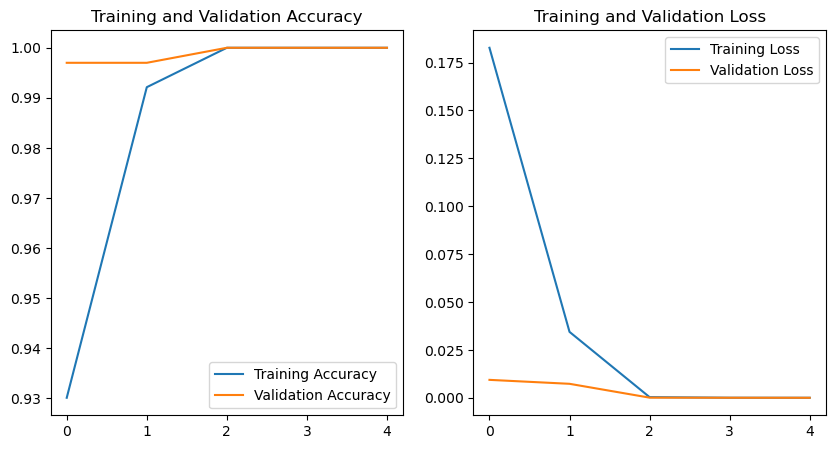

In [ ]:
# Training accuracy values
acc = history.history['accuracy']
# Validation accuracy values
val_acc = history.history['val_accuracy']

# Training loss values
loss = history.history['loss']
# Validation loss values
val_loss = history.history['val_loss']

# Define the range of epochs (x-axis values)
epochs_range = range(epochs)

# Create a subplot with two plots side by side for accuracy and loss visualization
plt.figure(figsize=(10, 5))

# Plot Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 1)  # Subplot 1
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')  # Display legend in the lower right corner
plt.title('Training and Validation Accuracy')

# Plot Training Loss and Validation Loss
plt.subplot(1, 2, 2)  # Subplot 2
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')  # Display legend in the upper right corner
plt.title('Training and Validation Loss')

# Show the entire figure with both subplots
plt.show()


In [ ]:
#Define the AUTOTUNE constant to automatically tune the number of CPU threads
AUTOTUNE = tf.data.AUTOTUNE
#To speed up data loading
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)  #Prefetching data for the validation dataset as well to overlap data preprocessing and model execution.

In [ ]:
# Create a Rescaling layer to normalize pixel values in the range [0, 255] to [0, 1]
norm_layer = layers.Rescaling(1/255)

# Apply the normalization layer to the training dataset using the map function
# It normalizes the 'x' (input image) by dividing it by 255 and keeps 'y' (labels).
normalized_ds = train_ds.map(lambda x, y: (norm_layer(x), y))

# Retrieve a batch of normalized images and their corresponding labels
image_batch, labels_batch = next(iter(normalized_ds))

# Extract the first image from the batch
first_image = image_batch[0]

# Print the minimum and maximum pixel values in the first normalized image
print(np.min(first_image), np.max(first_image))


0.0 1.0


Did you apply any data augmentation? If yes, plot the sample image from your augmentation.

In [ ]:
# Create a Sequential model for data augmentation
data_augmentation = keras.Sequential(

    # Randomly flip images horizontally (left to right)
    [layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),

    # Randomly rotate images by a maximum of 0.1 radians (about 5.7 degrees)
    layers.RandomRotation(0.1),

    # Randomly zoom into images by a maximum factor of 0.1
    layers.RandomZoom(0.1)]
)


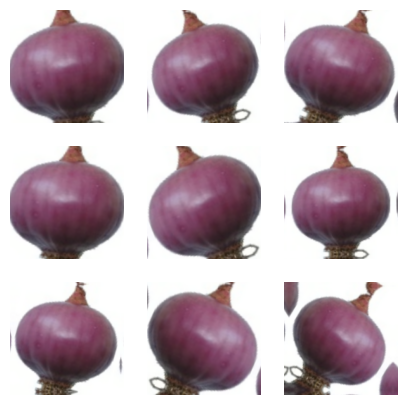

In [ ]:
# Create a new figure with a specified size (5x5 inches)
plt.figure(figsize=(5, 5))

# Loop over the first batch of images and apply data augmentation to them
for images, _ in train_ds.take(1):

  # Iterate through 9 times to create a 3x3 grid of augmented images
  for i in range(9):

    # Apply data augmentation to the input images
    augmented_images = data_augmentation(images)

    # Create a subplot within a 3x3 grid
    ax = plt.subplot(3, 3, i + 1)

    # Display the augmented image
    plt.imshow(augmented_images[0].numpy().astype('uint8'))

    # Turn off axis labels and ticks
    plt.axis('off')


In [ ]:
# Calculate the number of classes based on the length of the class names list
num_classes = len(class_names)

# Create a Sequential model for building a convolutional neural network (CNN)
model = tf.keras.Sequential([

    # Data Augmentation Layer: Applies data augmentation transformations to input images
    data_augmentation,

    # Rescaling Layer: Normalizes pixel values in the range [0, 255] to [0, 1]
    layers.Rescaling(1/255),

    # First Block of Convolution and Pooling Operations:
    layers.Conv2D(16, 3, padding="same", activation="relu"),  # Apply 16 convolutional filters with a 3x3 kernel
    layers.MaxPooling2D(),  # Max-pooling layer to downsample the feature maps

    # Second Block of Convolution and Pooling Operations:
    layers.Conv2D(32, 3, padding="same", activation="relu"),  # Apply 32 convolutional filters with a 3x3 kernel
    layers.MaxPooling2D(),  # Max-pooling layer

    # Third Block of Convolution and Pooling Operations:
    layers.Conv2D(64, 3, padding="same", activation="relu"),  # Apply 64 convolutional filters with a 3x3 kernel
    layers.MaxPooling2D(),  # Max-pooling layer

    layers.Conv2D(128, 3, padding="same", activation="relu"),  # Apply 128 convolutional filters with a 3x3 kernel
    layers.MaxPooling2D(),  # Max-pooling layer

    # Fully connected classifier:
    layers.Flatten(),  # Flatten the feature maps into a 1D vector
    layers.Dropout(0.2),  # Apply dropout regularization to prevent overfitting
    layers.Dense(128, activation="relu"),  # Fully connected layer with 128 units and ReLU activation
    layers.Dense(64, activation="relu"),  # Fully connected layer with 64 units and ReLU activation

    # Output layer with the number of units equal to the number of classes
    layers.Dense(num_classes, name='outputs')
])


In [ ]:
'''
num_class = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
    # First Block of Convolution and Pooling Operations.
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),
        # Second Block of Convolution and Pooling Operations.
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),

        # Third Block of Convolution and Pooling Operations.
    layers.Conv2D(96, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),



        # Fully connected classifier.
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")

])

'''

In [ ]:
# Adam to adjust the model's weights during training to minimize the loss function.
model.compile(
    optimizer='adam',

    # Loss Function:
    # 'SparseCategoricalCrossentropy' is a specific loss function used for classification tasks where the target labels are integers (e.g., 0, 1, 2).
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

    # It measures the percentage of correctly classified examples in the dataset.
    metrics=['accuracy']
)

# This callback monitors the model's validation loss and stops training if the validation loss does not improve for a certain number of epochs (patience), 'patience=10' means that if the validation loss does not improve for 10 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
#Setting the number of training epochs to 10
epochs = 10

#`model.fit` is used to train the model with the provided training dataset (`train_ds`), it also evaluates the model's performance on the validation dataset (`val_ds`).

history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs,  # Number of training epochs
    callbacks=[early_stopping]  # Early stopping callback to monitor and control training
)


Epoch 1/10
167/167 [==============================] - 49s 286ms/step - loss: 0.3876 - accuracy: 0.8404 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 2/10
167/167 [==============================] - 48s 286ms/step - loss: 0.0931 - accuracy: 0.9721 - val_loss: 0.0435 - val_accuracy: 0.9828
Epoch 3/10
167/167 [==============================] - 50s 299ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0089 - val_accuracy: 0.9993
Epoch 4/10
167/167 [==============================] - 48s 287ms/step - loss: 0.0145 - accuracy: 0.9948 - val_loss: 6.2440e-04 - val_accuracy: 1.0000
Epoch 5/10
167/167 [==============================] - 48s 285ms/step - loss: 0.0333 - accuracy: 0.9884 - val_loss: 0.0175 - val_accuracy: 0.9925
Epoch 6/10
167/167 [==============================] - 48s 287ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/10
167/167 [==============================] - 48s 290ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0020 - va

In [ ]:
model.save("/content/drive/MyDrive/Level6/AI/Image Datasets/Vegetable Classification/Train/trained_model.h5")

D:\Required intsall\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_ds)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

42/42 [==============================] - 2s 53ms/step - loss: 6.9424e-04 - accuracy: 1.0000
Validation Loss: 0.0007, Validation Accuracy: 1.0000


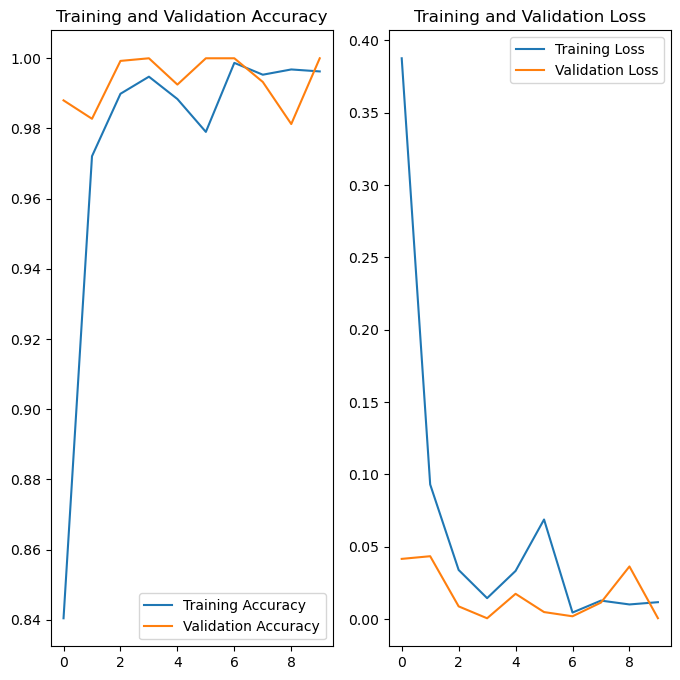

In [ ]:
# Extract training and validation accuracy values from the training history
acc = history.history['accuracy']  # Training accuracy values
val_acc = history.history['val_accuracy']  # Validation accuracy values

# Extract training and validation loss values from the training history
loss = history.history['loss']  # Training loss values
val_loss = history.history['val_loss']  # Validation loss values

# Create a range of epochs for the x-axis of the plots
epochs_range = range(epochs)

# Create a figure for plotting with a specified size (8x8 inches)
plt.figure(figsize=(8, 8))

# Plot Training Accuracy and Validation Accuracy:
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid (1st subplot)
plt.plot(epochs_range, acc, label='Training Accuracy')  # Plot training accuracy values
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # Plot validation accuracy values
plt.legend(loc='lower right')  # Display a legend in the lower right corner
plt.title('Training and Validation Accuracy')  # Set the title for the subplot

# Plot Training Loss and Validation Loss:
plt.subplot(1, 2, 2)  # Create a subplot in a 1x2 grid (2nd subplot)
plt.plot(epochs_range, loss, label='Training Loss')  # Plot training loss values
plt.plot(epochs_range, val_loss, label='Validation Loss')  # Plot validation loss values
plt.legend(loc='upper right')  # Display a legend in the upper right corner
plt.title('Training and Validation Loss')  # Set the title for the subplot

# Display the entire figure containing both subplots
plt.show()


1/1 [==============================] - 0s 121ms/step
The image is Lemon and the accuracy is 100.00%


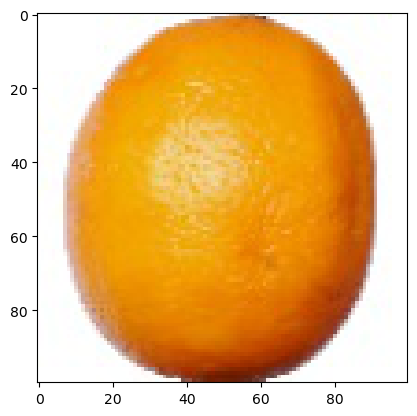

In [ ]:
# Import the Image module from the Python Imaging Library (PIL)
from PIL import Image

# Define the path to the test image
test1 = "D:\College\AI ML\Vegetable Classification/Test/9_100(1).jpg"

# Load the test image and convert it to a NumPy array
sample_img = np.asarray(Image.open(test1))

# Display the test image using Matplotlib
imgplot = plt.imshow(sample_img)

# Load and preprocess the test image for model prediction

# Load the test image while resizing it to the target size defined by img_height and img_width
img = tf.keras.utils.load_img(test1, target_size=(img_height, img_width))

# Convert the loaded image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Expand the dimensions of the image to match the model's input shape
img_array = tf.expand_dims(img_array, 0)

# Make predictions using the trained model on the preprocessed test image
predictions = model.predict(img_array)

# Calculate the softmax score to obtain class probabilities
score = tf.nn.softmax(predictions[0])

# Print the predicted class label and its associated confidence (accuracy) score
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))


1/1 [==============================] - 0s 23ms/step
The image is Potato and the accuracy is 99.53%


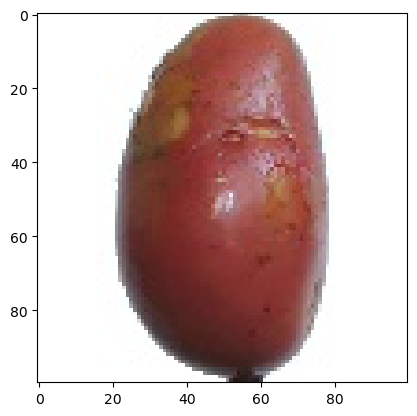

In [ ]:
# Import the Image module from the Python Imaging Library (PIL)
from PIL import Image

# Define the path to the test image
test1 = "D:\College\AI ML\Vegetable Classification/Test/26_100(1).jpg"

# Load the test image and convert it to a NumPy array
sample_img = np.asarray(Image.open(test1))

# Display the test image using Matplotlib
imgplot = plt.imshow(sample_img)

# Load and preprocess the test image for model prediction

# Load the test image while resizing it to the target size defined by img_height and img_width
img = tf.keras.utils.load_img(test1, target_size=(img_height, img_width))

# Convert the loaded image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Expand the dimensions of the image to match the model's input shape
img_array = tf.expand_dims(img_array, 0)

# Make predictions using the trained model on the preprocessed test image
predictions = model.predict(img_array)

# Calculate the softmax score to obtain class probabilities
score = tf.nn.softmax(predictions[0])

# Print the predicted class label and the associated confidence (accuracy) score
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))



1/1 [==============================] - 0s 23ms/step
The image is Bell-Pepper and the accuracy is 100.00%


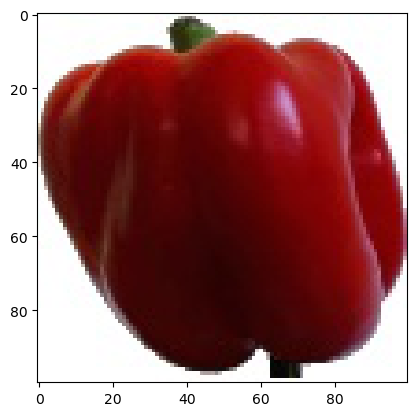

In [ ]:
# Import the Image module from the Python Imaging Library (PIL)
from PIL import Image

# Define the path to the test image
test1 = "D:\College\AI ML\Vegetable Classification/Test/13_100(1).jpg"

# Load the test image and convert it to a NumPy array
sample_img = np.asarray(Image.open(test1))

# Display the test image using Matplotlib
imgplot = plt.imshow(sample_img)

# Load and preprocess the test image for model prediction

# Load the test image while resizing it to the target size defined by img_height and img_width
img = tf.keras.utils.load_img(test1, target_size=(img_height, img_width))

# Convert the loaded image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Expand the dimensions of the image to match the model's input shape
img_array = tf.expand_dims(img_array, 0)

# Make predictions using the trained model on the preprocessed test image
predictions = model.predict(img_array)

# Calculate the softmax score to obtain class probabilities
score = tf.nn.softmax(predictions[0])

# Print the predicted class label and the associated confidence (accuracy) score
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))


1/1 [==============================] - 0s 23ms/step
The image is Onion and the accuracy is 100.00%


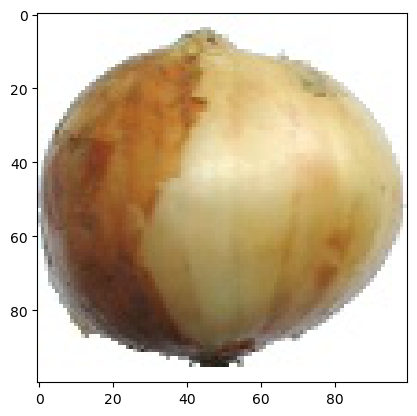

In [ ]:
# Import the Image module from the Python Imaging Library (PIL)
from PIL import Image

# Define the path to the test image
test1 = "D:\College\AI ML\Vegetable Classification/Test/15_100(1).jpg"

# Load the test image and convert it to a NumPy array
sample_img = np.asarray(Image.open(test1))

# Display the test image using Matplotlib
imgplot = plt.imshow(sample_img)

# Load and preprocess the test image for model prediction

# Load the test image while resizing it to the target size defined by img_height and img_width
img = tf.keras.utils.load_img(test1, target_size=(img_height, img_width))

# Convert the loaded image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Expand the dimensions of the image to match the model's input shape
img_array = tf.expand_dims(img_array, 0)

# Make predictions using the trained model on the preprocessed test image
predictions = model.predict(img_array)

# Calculate the softmax score to obtain class probabilities
score = tf.nn.softmax(predictions[0])

# Print the predicted class label and the associated confidence (accuracy) score
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))



1/1 [==============================] - 0s 24ms/step
The image is Tomato and the accuracy is 100.00%


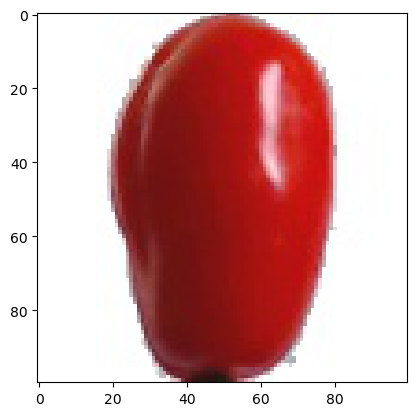

In [ ]:
# Import the Image module from the Python Imaging Library (PIL)
from PIL import Image

# Define the path to the test image
test1 = "D:\College\AI ML\Vegetable Classification/Test/75_100(1).jpg"

# Load the test image and convert it to a NumPy array
sample_img = np.asarray(Image.open(test1))

# Display the test image using Matplotlib
imgplot = plt.imshow(sample_img)

# Load and preprocess the test image for model prediction

# Load the test image while resizing it to the target size defined by img_height and img_width
img = tf.keras.utils.load_img(test1, target_size=(img_height, img_width))

# Convert the loaded image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Expand the dimensions of the image to match the model's input shape
img_array = tf.expand_dims(img_array, 0)

# Make predictions using the trained model on the preprocessed test image
predictions = model.predict(img_array)

# Calculate the softmax score to obtain class probabilities
score = tf.nn.softmax(predictions[0])

# Print the predicted class label and the associated confidence (accuracy) score
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))



##Pretrained Model

In [ ]:
data_dir = "D:\College\AI ML\Vegetable Classification\Train"

In [ ]:
#Specifies how many data samples
batch_size = 32

#Define the size to which input images will be resized.
image_size = (180, 180)

#Specify the number of classes in the classification.
num_classes = 5


In [ ]:
#Importing the ResNet50 and MobileNetV2 pre-trained models from TensorFlow Keras applications.
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2

#Importing necessary components for building and training the model.
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

#Importing the 'os' module for handling file and directory operations.
import os


In [ ]:
# Create an ImageDataGenerator object to preprocess and augment the training data.
data_generator = ImageDataGenerator(
    rescale=1/255,    # Normalize pixel values to the range [0, 1]
    validation_split=0.2,  # Split the data into a validation set with 20% of the data
    rotation_range=20,  # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of images by up to 20%
    height_shift_range=0.2,  # Randomly shift the height of images by up to 20%
    shear_range=0.2,  # Apply shear transformations with a maximum shear intensity of 20%
    zoom_range=0.2,  # Randomly zoom in on images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest available pixel
)


In [ ]:
# Create a training data generator using the 'flow_from_directory' method.
train_ds = data_generator.flow_from_directory(
    data_dir,              # Directory containing training data
    target_size=image_size,  # Resize input images to the specified dimensions
    batch_size=batch_size,   # Number of images in each batch
    class_mode='categorical',  # Categorical mode for multi-class classification
    subset='training'         # Use the 'training' subset of the dataset
)

# Create a validation data generator using the 'flow_from_directory' method.
val_ds = data_generator.flow_from_directory(
    data_dir,              # Directory containing validation data
    target_size=image_size,  # Resize input images to the specified dimensions
    batch_size=batch_size,   # Number of images in each batch
    class_mode='categorical',  # Categorical mode for multi-class classification
    subset='validation'       # Use the 'validation' subset of the dataset
)


Found 5341 images belonging to 5 classes.
Found 1332 images belonging to 5 classes.


## MobileNet

In [ ]:
# Load pre-trained MobileNetV2 model (excluding the top layers)

#The 'include_top' parameter is set to False, which means we are excluding the top layers (fully connected layers) of the model and we are using this base model as a feature extractor.

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

x = GlobalAveragePooling2D()(base_model.output)  # This layer computes the average of all values in each feature map, resulting in a fixed-size output.

x = Dense(256, activation='relu')(x)    # The 'relu' activation function is used for this layer, which introduces non-linearity.

x = Dropout(0.5)(x)    # Dropout is a regularization technique that helps prevent overfitting by randomly deactivating a fraction of neurons during training.

# A final Dense layer with 'num_classes' units is added for the model's output and the 'softmax' activation function is used to compute class probabilities.
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
mobilenet_model = Model(inputs=base_model.input, outputs=output)




In [ ]:
# This variable 'freeze_layer_num' specifies the number of initial layers in the base model that will be frozen (non-trainable).

freeze_layer_num = 100

for layer in base_model.layers[:freeze_layer_num]:  # Looping through the layers in the base model up to the specified number.
    layer.trainable = False   # Set the 'trainable' attribute of each layer to False, this means that the weights and biases of these layers will not be updated during training.

# Compiling the model
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Define callbacks to enhance model's accuracy.
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)


In [ ]:
#Summary of the model
mobilenet_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_14[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']     

 block_3_expand_relu (ReLU)  (None, None, None, 144)      0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, None, None, 144)      0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, None, None, 144)      1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, None, None, 144)      576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, None, None, 192)      768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, None, None, 192)      0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, None, None, 64)       12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, None, None, 64)       256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, None, None, 64)       0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, None, None, 384)      24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, None, None, 384)      1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, None, None, 384)      0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, None, None, 576)      0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, None, None, 576)      0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, None, None, 576)      5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, None, None, 960)      3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, None, None, 960)      0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, None, None, 320)      307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [ ]:
# Specifing the number of training epochs
epochs = 10

#The 'fit' method trains the model using the provided training dataset ('train_ds') and evaluates it on the validation dataset ('val_ds').
history = mobilenet_model.fit(    # The training history (e.g., loss and accuracy for each epoch) is stored in the 'history' variable, which can be used for later analysis or visualization.
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs,  # Number of training epochs
    callbacks=[early_stopping]  # List of callbacks to be applied during training
)


Epoch 1/10
167/167 [==============================] - 72s 412ms/step - loss: 0.1480 - accuracy: 0.9493 - val_loss: 0.0217 - val_accuracy: 0.9910
Epoch 2/10
167/167 [==============================] - 67s 400ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 3/10
167/167 [==============================] - 68s 407ms/step - loss: 0.0174 - accuracy: 0.9936 - val_loss: 0.0322 - val_accuracy: 0.9865
Epoch 4/10
167/167 [==============================] - 68s 407ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.1480 - val_accuracy: 0.9632
Epoch 5/10
167/167 [==============================] - 68s 407ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 6/10
167/167 [==============================] - 65s 390ms/step - loss: 0.0160 - accuracy: 0.9940 - val_loss: 0.1075 - val_accuracy: 0.9677


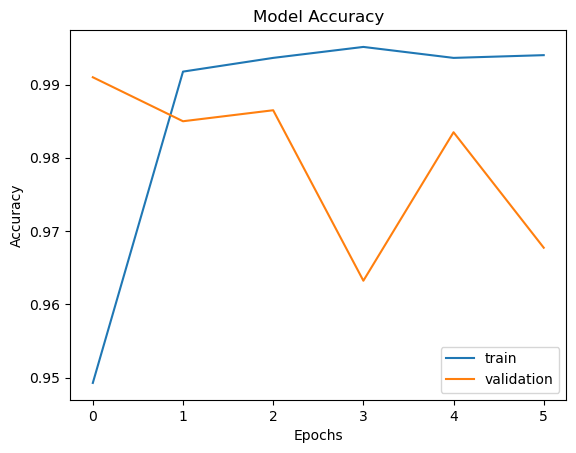

In [ ]:
# Plotting the training accuracy
plt.plot(history.history['accuracy'])

# Plotting the validation accuracy
plt.plot(history.history['val_accuracy'])

# Set the plot title
plt.title('Model Accuracy')

# Set the y-axis label
plt.ylabel('Accuracy')

# Set the x-axis label
plt.xlabel('Epochs')

# Adds a legend to the plot to indicate which line represents training accuracy and which represents validation accuracy.
plt.legend(['train', 'validation'])

# Display the plot
plt.show()


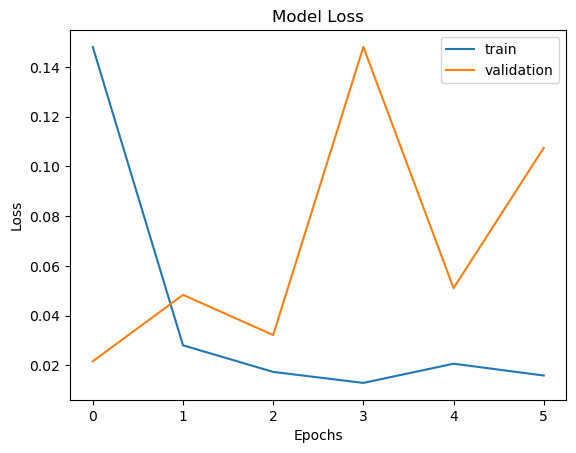

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'])

# Plot the validation loss
plt.plot(history.history['val_loss'])
# This line plots the validation loss over the epochs.
# 'history.history' also contains recorded validation metrics, and 'val_loss' is the loss on the validation data.

# Set the plot title
plt.title('Model Loss')

# Set the y-axis label
plt.ylabel('Loss')

# Set the x-axis label
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
# Adds a legend to the plot to indicate which line represents training loss and which represents validation loss.

# Display the plot
plt.show()


In [ ]:
loss0, accuracy0=mobilenet_model.evaluate(val_ds)

42/42 [==============================] - 13s 311ms/step - loss: 0.0262 - accuracy: 0.9917


1/1 [==============================] - 1s 713ms/step
The image is Bell-Pepper and the accuracy is 34.70%


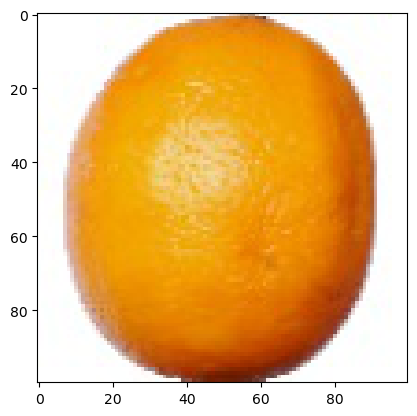

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the second test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/9_100(1).jpg"
# This line specifies the file path to the second test image.

# Load and display the second test image using PIL
sample_img = np.asarray(Image.open(testb2))
# The second test image is loaded using PIL's Image.open() method and converted to a NumPy array.
# This NumPy array can be used for visualization and processing.

imgplot = plt.imshow(sample_img)
# Display the loaded second test image using matplotlib's imshow() function.
# This shows the second test image in the current Python environment.

# Load and preprocess the second test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)
# The second test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

img_array = tf.keras.utils.img_to_array(img)
# Convert the loaded second image to a NumPy array using img_to_array() function.
# This prepares the image data for processing by the model.

img_array = tf.expand_dims(img_array, 0)
# Expand the dimensions of the second image array to match the expected input shape for the model.
# This adds an extra dimension to indicate a batch of one image.

# Make predictions using the trained model
predictions = mobilenet_model.predict(img_array)
# Use the trained 'mobilenet_model' to make predictions on the preprocessed second test image.
# The 'predictions' variable will contain the model's output.

score = tf.nn.softmax(predictions[0])
# Softmax function is applied to the model's predictions to convert them into class probabilities.
# 'score' will contain the probabilities for each class.

# Print the predicted class and its corresponding probability for the second image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))
# This line prints the predicted class (the one with the highest probability) and its corresponding probability as a percentage for the second image.




1/1 [==============================] - 0s 36ms/step
The image is Bell-Pepper and the accuracy is 29.12%


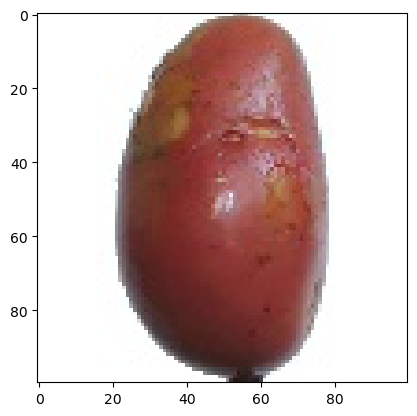

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the second test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/26_100(1).jpg"
# This line specifies the file path to the second test image.

# Load and display the second test image using PIL
sample_img = np.asarray(Image.open(testb2))
# The second test image is loaded using PIL's Image.open() method and converted to a NumPy array.
# This NumPy array can be used for visualization and processing.

imgplot = plt.imshow(sample_img)
# Display the loaded second test image using matplotlib's imshow() function.
# This shows the second test image in the current Python environment.

# Load and preprocess the second test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)
# The second test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

img_array = tf.keras.utils.img_to_array(img)
# Convert the loaded second image to a NumPy array using img_to_array() function.
# This prepares the image data for processing by the model.

img_array = tf.expand_dims(img_array, 0)
# Expand the dimensions of the second image array to match the expected input shape for the model.
# This adds an extra dimension to indicate a batch of one image.

# Make predictions using the trained model
predictions = mobilenet_model.predict(img_array)
# Use the trained 'mobilenet_model' to make predictions on the preprocessed second test image.
# The 'predictions' variable will contain the model's output.

score = tf.nn.softmax(predictions[0])
# Softmax function is applied to the model's predictions to convert them into class probabilities.
# 'score' will contain the probabilities for each class.

# Print the predicted class and its corresponding probability for the second image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))
# This line prints the predicted class (the one with the highest probability) and its corresponding probability as a percentage for the second image.



1/1 [==============================] - 0s 33ms/step
The image is Lemon and the accuracy is 26.03%


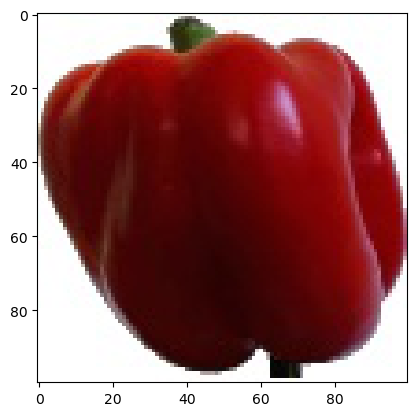

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the second test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/13_100(1).jpg"
# This line specifies the file path to the second test image.

# Load and display the second test image using PIL
sample_img = np.asarray(Image.open(testb2))
# The second test image is loaded using PIL's Image.open() method and converted to a NumPy array.
# This NumPy array can be used for visualization and processing.

imgplot = plt.imshow(sample_img)
# Display the loaded second test image using matplotlib's imshow() function.
# This shows the second test image in the current Python environment.

# Load and preprocess the second test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)
# The second test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

img_array = tf.keras.utils.img_to_array(img)
# Convert the loaded second image to a NumPy array using img_to_array() function.
# This prepares the image data for processing by the model.

img_array = tf.expand_dims(img_array, 0)
# Expand the dimensions of the second image array to match the expected input shape for the model.
# This adds an extra dimension to indicate a batch of one image.

# Make predictions using the trained model
predictions = mobilenet_model.predict(img_array)
# Use the trained 'mobilenet_model' to make predictions on the preprocessed second test image.
# The 'predictions' variable will contain the model's output.

score = tf.nn.softmax(predictions[0])
# Softmax function is applied to the model's predictions to convert them into class probabilities.
# 'score' will contain the probabilities for each class.

# Print the predicted class and its corresponding probability for the second image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))
# This line prints the predicted class (the one with the highest probability) and its corresponding probability as a percentage for the second image.




1/1 [==============================] - 0s 34ms/step
The image is Lemon and the accuracy is 30.62%


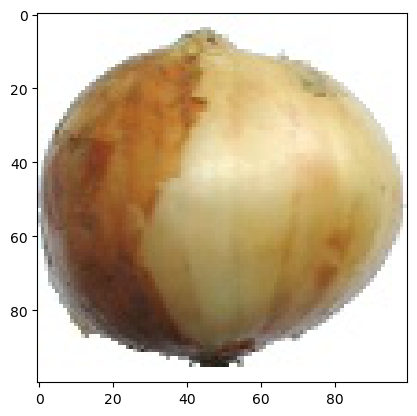

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the second test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/15_100(1).jpg"
# This line specifies the file path to the second test image.

# Load and display the second test image using PIL
sample_img = np.asarray(Image.open(testb2))
# The second test image is loaded using PIL's Image.open() method and converted to a NumPy array.
# This NumPy array can be used for visualization and processing.

imgplot = plt.imshow(sample_img)
# Display the loaded second test image using matplotlib's imshow() function.
# This shows the second test image in the current Python environment.

# Load and preprocess the second test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)
# The second test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

img_array = tf.keras.utils.img_to_array(img)
# Convert the loaded second image to a NumPy array using img_to_array() function.
# This prepares the image data for processing by the model.

img_array = tf.expand_dims(img_array, 0)
# Expand the dimensions of the second image array to match the expected input shape for the model.
# This adds an extra dimension to indicate a batch of one image.

# Make predictions using the trained model
predictions = mobilenet_model.predict(img_array)
# Use the trained 'mobilenet_model' to make predictions on the preprocessed second test image.
# The 'predictions' variable will contain the model's output.

score = tf.nn.softmax(predictions[0])
# Softmax function is applied to the model's predictions to convert them into class probabilities.
# 'score' will contain the probabilities for each class.

# Print the predicted class and its corresponding probability for the second image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))
# This line prints the predicted class (the one with the highest probability) and its corresponding probability as a percentage for the second image.



1/1 [==============================] - 0s 36ms/step
The image is Bell-Pepper and the accuracy is 30.53%


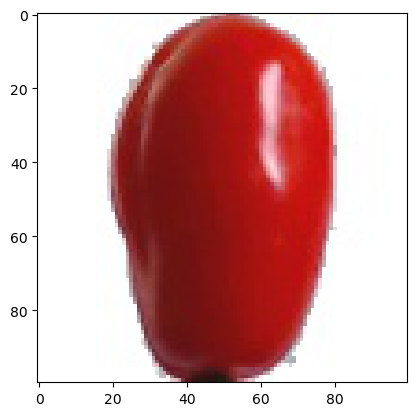

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the second test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/75_100(1).jpg"
# This line specifies the file path to the second test image.

# Load and display the second test image using PIL
sample_img = np.asarray(Image.open(testb2))
# The second test image is loaded using PIL's Image.open() method and converted to a NumPy array.
# This NumPy array can be used for visualization and processing.

imgplot = plt.imshow(sample_img)
# Display the loaded second test image using matplotlib's imshow() function.
# This shows the second test image in the current Python environment.

# Load and preprocess the second test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)
# The second test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

img_array = tf.keras.utils.img_to_array(img)
# Convert the loaded second image to a NumPy array using img_to_array() function.
# This prepares the image data for processing by the model.

img_array = tf.expand_dims(img_array, 0)
# Expand the dimensions of the second image array to match the expected input shape for the model.
# This adds an extra dimension to indicate a batch of one image.

# Make predictions using the trained model
predictions = mobilenet_model.predict(img_array)
# Use the trained 'mobilenet_model' to make predictions on the preprocessed second test image.
# The 'predictions' variable will contain the model's output.

score = tf.nn.softmax(predictions[0])
# Softmax function is applied to the model's predictions to convert them into class probabilities.
# 'score' will contain the probabilities for each class.

# Print the predicted class and its corresponding probability for the second image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))
# This line prints the predicted class (the one with the highest probability) and its corresponding probability as a percentage for the second image.




In [ ]:
# Evaluate the model's performance on the validation dataset

# Evaluate the model using the 'val_ds' dataset and store the loss and accuracy
loss0, accuracy0 = model.evaluate(val_ds)
# This line evaluates the model (referred to as 'model') on the validation dataset ('val_ds').
# 'loss0' will contain the calculated loss on the validation dataset, and 'accuracy0' will contain the accuracy.

# Evaluate the 'mobilenet_model' using the same validation dataset and store the loss and accuracy
loss0, accuracy0 = mobilenet_model.evaluate(val_ds)
# This line evaluates a different model ('mobilenet_model') on the same validation dataset ('val_ds').
# 'loss0' will contain the calculated loss for 'mobilenet_model' on the validation dataset, and 'accuracy0' will contain the accuracy.



In [ ]:
# Load pre-trained ResNet-50 model without top classification layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(180, 180, 3))

# Freeze initial layers of the base model
freeze_layer_num = 1000
for layer in base_model.layers[:freeze_layer_num]:
    layer.trainable = False

In [ ]:
# Add custom top layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)


In [ ]:
# Create the final model
resnet_model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks

# Early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# The 'EarlyStopping' callback is used to monitor the training process.
# - 'patience' specifies the number of epochs with no improvement after which training will be stopped.
# - 'restore_best_weights' allows the callback to restore the model's best weights when training is stopped.
#   This helps prevent overfitting by reverting to the best model state observed during training.

# Learning rate schedule callback
def lr_schedule(epoch, lr):
    if epoch < 3:
        return lr  # Keep the learning rate unchanged for the first 3 epochs
    else:
        return lr * 0.1  # Reduce the learning rate by a factor of 0.1 for subsequent epochs
# The 'LearningRateScheduler' callback is used to schedule the learning rate during training.
# It defines a custom learning rate schedule based on the epoch number.
# - For the first 3 epochs, the learning rate remains unchanged (no decay).
# - After the 3rd epoch, the learning rate is reduced by a factor of 0.1.
# This can help the model converge faster in the initial stages and fine-tune later.

lr_scheduler = LearningRateScheduler(lr_schedule)
# The 'lr_scheduler' variable is set to use the 'lr_schedule' function as a learning rate schedule during training.



In [ ]:
resnet_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_24[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 45, 45, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 45, 45, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 45, 45, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 23, 23, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 23, 23, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 23, 23, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 12, 12, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 12, 12, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 12, 12, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 12, 12, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 12, 12, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 12, 12, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 12, 12, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 12, 12, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 12, 12, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 12, 12, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 6, 6, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 6, 6, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 6, 6, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [ ]:
# Train the model with an increased number of epochs

# Specify the number of training epochs (increased to 10)
epochs = 10
# This variable 'epochs' determines the number of times the model will be trained on the entire training dataset.
# In this case, the number of epochs has been increased to 10.

# Use the 'fit' method to train the 'resnet_model' with callbacks
history = resnet_model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs,  # Number of training epochs
    callbacks=[early_stopping, lr_scheduler]  # List of callbacks to be applied during training
)
# The 'fit' method trains the model using the provided training dataset ('train_ds') and evaluates it on the validation dataset ('val_ds').
# It also specifies the number of training epochs as well as a list of callbacks to be applied during training.

# The 'early_stopping' callback monitors the training progress and can stop training early if needed.
# The 'lr_scheduler' callback adjusts the learning rate during training according to the custom schedule defined earlier.




Epoch 1/10
167/167 [==============================] - 201s 1s/step - loss: 1.2313 - accuracy: 0.5141 - val_loss: 12.6090 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - 189s 1s/step - loss: 0.7479 - accuracy: 0.7085 - val_loss: 4.6615 - val_accuracy: 0.2860 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - 202s 1s/step - loss: 0.5887 - accuracy: 0.7746 - val_loss: 2.2690 - val_accuracy: 0.4452 - lr: 0.0010
Epoch 4/10
167/167 [==============================] - 189s 1s/step - loss: 0.4913 - accuracy: 0.8146 - val_loss: 1.1780 - val_accuracy: 0.5796 - lr: 1.0000e-04
Epoch 5/10
167/167 [==============================] - 200s 1s/step - loss: 0.4524 - accuracy: 0.8339 - val_loss: 0.4653 - val_accuracy: 0.8378 - lr: 1.0000e-05
Epoch 6/10
167/167 [==============================] - 193s 1s/step - loss: 0.4588 - accuracy: 0.8246 - val_loss: 0.4213 - val_accuracy: 0.8363 - lr: 1.0000e-06
Epoch 7/10
167/167 [==============================]

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/75_100(1).jpg"
# This line specifies the file path to the test image.

# Load and display the test image using PIL
sample_img = np.asarray(Image.open(testb2))
# The test image is loaded using PIL's Image.open() method and converted to a NumPy array.
# This NumPy array can be used for visualization and processing.

imgplot = plt.imshow(sample_img)
# Display the loaded test image using matplotlib's imshow() function.
# This shows the test image in the current Python environment.

# Load and preprocess the test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)
# The test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

img_array = tf.keras.utils.img_to_array(img)
# Convert the loaded image to a NumPy array using img_to_array() function.
# This prepares the image data for processing by the model.

img_array = tf.expand_dims(img_array, 0)
# Expand the dimensions of the image array to match the expected input shape for the model.
# This adds an extra dimension to indicate a batch of one image.

# Make predictions using the trained 'resnet_model'
predictions = resnet_model.predict(img_array)
# Use the trained 'resnet_model' to make predictions on the preprocessed test image.
# The 'predictions' variable will contain the model's output.

score = tf.nn.softmax(predictions[0])
# Softmax function is applied to the model's predictions to convert them into class probabilities.
# 'score' will contain the probabilities for each class.

# Print the predicted class and its corresponding probability for the test image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))
# This line prints the predicted class (the one with the highest probability) and its corresponding probability as a percentage for the test image.



NameError: ignored

1/1 [==============================] - 0s 99ms/step
The image is Onion and the accuracy is 40.21%


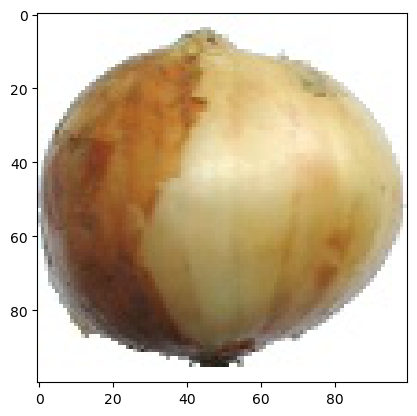

In [ ]:
# Import the necessary libraries
from PIL import Image  # Import the Image module from the Python Imaging Library (PIL).

# Define the path to the test image
testb2 = "D:\College\AI ML\Vegetable Classification/Test/15_100(1).jpg"
# This line specifies the file path to the test image.

# Load and display the test image using PIL
sample_img = np.asarray(Image.open(testb2))

# Display the loaded test image using matplotlib's imshow() function
imgplot = plt.imshow(sample_img)

# Load and preprocess the test image for model prediction
img = tf.keras.utils.load_img(
    testb2, target_size=(img_height, img_width)
)      # The test image is loaded using TensorFlow's load_img() function and resized to the specified target size.

# Convert the loaded image to a NumPy array using img_to_array() function.
img_array = tf.keras.utils.img_to_array(img)

# This adds an extra dimension to indicate a batch of one image.
img_array = tf.expand_dims(img_array, 0)


# Make predictions using the trained 'resnet_model'
predictions = resnet_model.predict(img_array)

# Softmax function is applied to the model's predictions to convert them into class probabilities.
score = tf.nn.softmax(predictions[0])

# Print the predicted class and its corresponding probability for the test image
print('The image is {} and the accuracy is {:.2f}%'.format(class_names[np.argmax(score)], np.max(score) * 100))




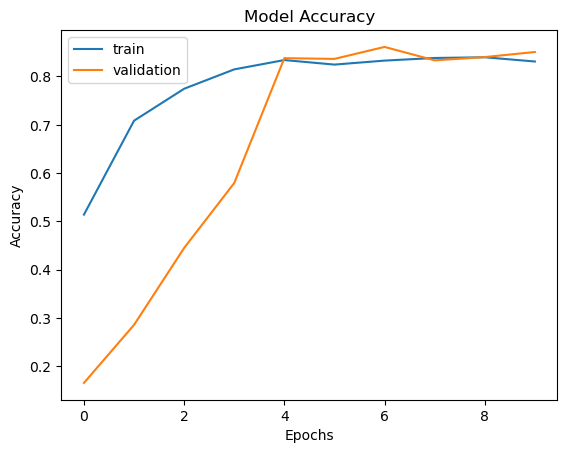

In [ ]:

# Plot the training accuracy
plt.plot(history.history['accuracy'])

# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])

# Set the plot title
plt.title('Model Accuracy')
# Sets the title of the plot as 'Model Accuracy'.

# Set the y-axis label
plt.ylabel('Accuracy')

# Set the x-axis label
plt.xlabel('Epochs')

# Add a legend to the plot to distinguish training and validation accuracy
plt.legend(['train', 'validation'])

# Display the plot
plt.show()



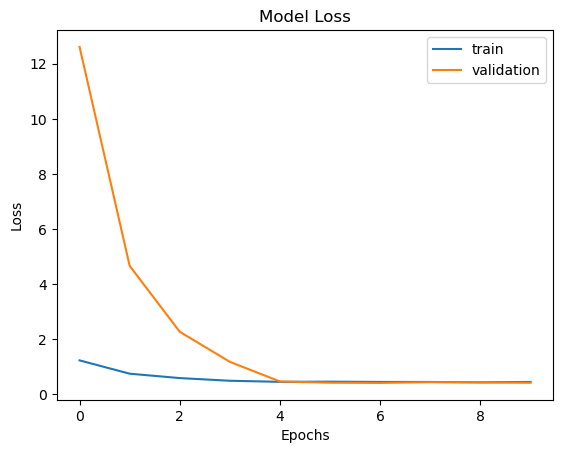

In [ ]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Plot the training loss over epochs using data from history object
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss over epochs using data from history object
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set the title of the plot
plt.title('Model Loss')

# Label the y-axis
plt.ylabel('Loss')

# Label the x-axis
plt.xlabel('Epochs')

# Add a legend to the plot to distinguish between training and validation loss curves
plt.legend(['Train', 'Validation'])

# Display the plot
plt.show()
